<a href="https://colab.research.google.com/github/Revathilokeshan/Capstone-Project/blob/main/Capstone_project_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7. For this problem, use the population dataset, and perform the following:     

*   EDA on the time series to find trends and seasonality.
*   Forecast the population on the given dataset for the next 6 months. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [26]:
! pip install pmdarima

     |████████████████████████████████| 1.4 MB 30.7 MB/s 
     |████████████████████████████████| 9.8 MB 52.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
data=pd.read_csv("popdata.csv",index_col="date",parse_dates=True)
data.head()

,value
date,
1952-01-01,127299.0
1952-01-02,127517.0
1952-01-03,127721.0
1952-01-04,127933.0
1952-01-05,128130.0


<Figure size 720x720 with 0 Axes>

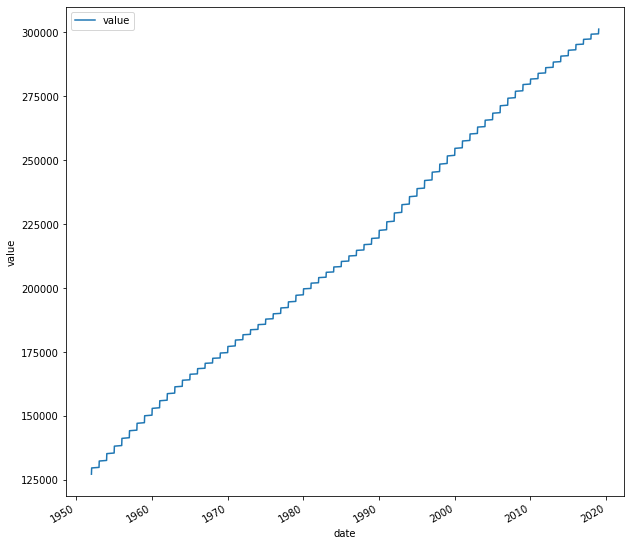

In [3]:
plt.figure(figsize=(10,10))
data.plot(figsize=(10,10))
plt.xlabel("date")
plt.ylabel("value")
plt.show()

In [4]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(20))
print(rolstd.head(20))

                    value
date                     
1952-01-01            NaN
1952-01-02            NaN
1952-01-03            NaN
1952-01-04            NaN
1952-01-05            NaN
1952-01-06            NaN
1952-01-07            NaN
1952-01-08            NaN
1952-01-09            NaN
1952-01-10            NaN
1952-01-11            NaN
1952-01-12  128482.583333
1953-01-01  128704.583333
1953-01-02  128924.833333
1953-01-03  129143.000000
1953-01-04  129360.750000
1953-01-05  129577.833333
1953-01-06  129795.583333
1953-01-07  130014.833333
1953-01-08  130235.750000
                 value
date                  
1952-01-01         NaN
1952-01-02         NaN
1952-01-03         NaN
1952-01-04         NaN
1952-01-05         NaN
1952-01-06         NaN
1952-01-07         NaN
1952-01-08         NaN
1952-01-09         NaN
1952-01-10         NaN
1952-01-11         NaN
1952-01-12  794.979526
1953-01-01  806.297538
1953-01-02  813.356439
1953-01-03  812.209556
1953-01-04  808.582163
1953-01-05  79

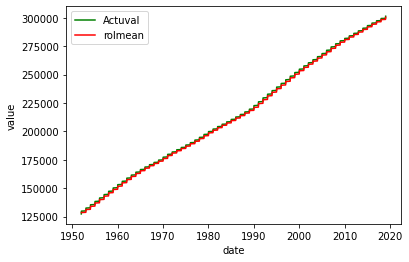

In [5]:
actuval=plt.plot(data,color='green',label='Actuval')
rolme=plt.plot(rolmean,color='red',label='rolmean')
#rolstd=plt.plot(rolstd,color='blue',label='rolstd')
plt.xlabel('date')
plt.ylabel('value')
plt.legend()
plt.show(block=False)

Rollingmean follow the trend

In [7]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['value'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -0.665317
p-value                   0.855530
Lags Used                17.000000
No. of Obs              798.000000
Critical Value (1%)      -3.438571
Critical Value (5%)      -2.865169
Critical Value (10%)     -2.568702
dtype: float64


-From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

-data following trend

Making data stationary using log method

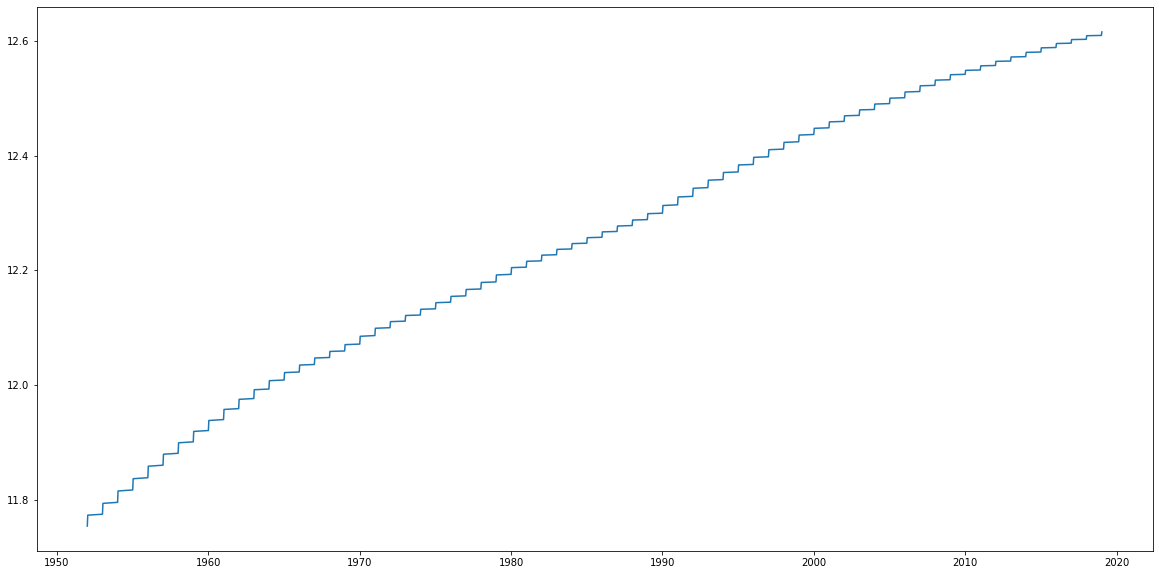

In [8]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

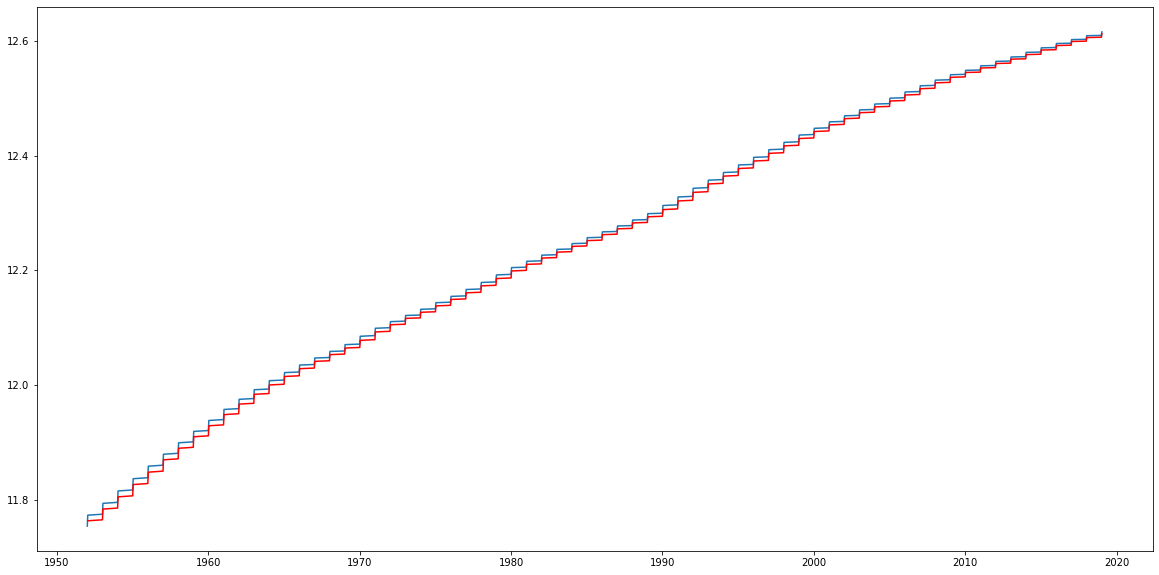

In [9]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='red')

Tested Rolling Mean with window 12 on above log transformation and concluded non-stationary again as mean is not constant

Using another method differencing, to make our time series stationary

In [10]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,value
date,
1952-01-01,NaN
1952-01-02,NaN
1952-01-03,NaN
1952-01-04,NaN
1952-01-05,NaN
1952-01-06,NaN
1952-01-07,NaN
1952-01-08,NaN
1952-01-09,NaN


In [11]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,value
date,
1952-01-12,0.009811
1953-01-01,0.009748
1953-01-02,0.009553
1953-01-03,0.009237
1953-01-04,0.009139


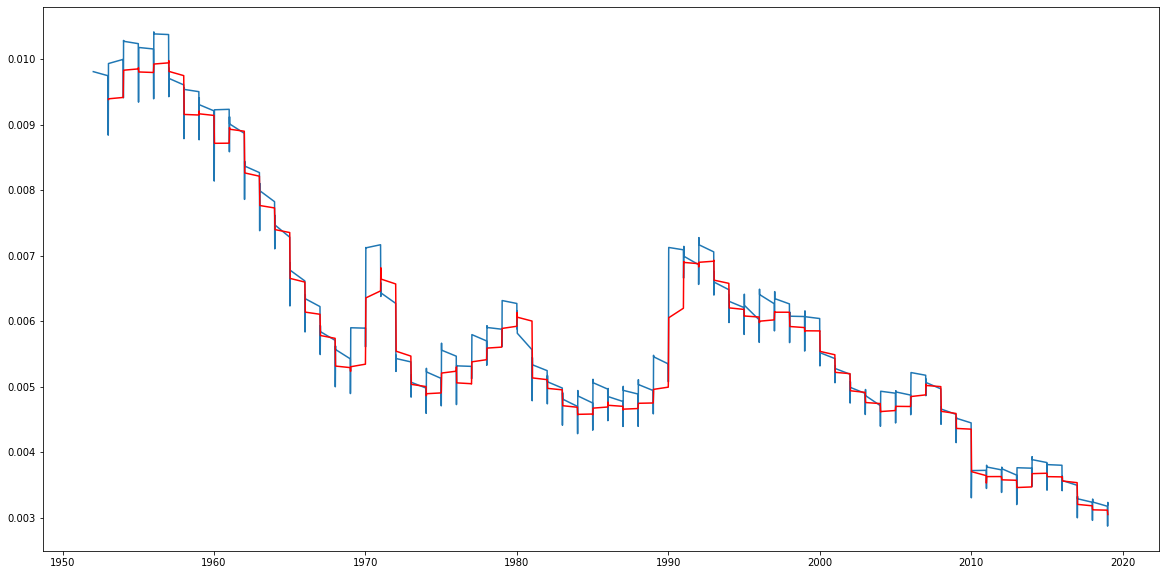

In [12]:
plt.figure(figsize=(20,10))
MAvg_log_diff=data_log_diff.rolling(window=12).mean()
MStd_log_diff=data_log_diff.rolling(window=12).std()
plt.plot(data_log_diff)
plt.plot(MAvg_log_diff, color='red')

In [13]:
print('Dickey-Fuller Test: ')
dftest_log_diff=adfuller(data_log_diff['value'], autolag='AIC')
dfoutput_log_diff=pd.Series(dftest_log_diff[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest_log_diff[4].items():
    dfoutput_log_diff['Critical Value (%s)'%key] = value
print(dfoutput_log_diff)

Dickey-Fuller Test: 
Test Statistic           -1.873742
p-value                   0.344513
Lags Used                17.000000
No. of Obs              787.000000
Critical Value (1%)      -3.438686
Critical Value (5%)      -2.865219
Critical Value (10%)     -2.568729
dtype: float64


Again P value is not less than 0.05 and test value is also not less than critical value, so data is still non stationary

In [14]:
data_log_diff_1=data_log_diff-MAvg_log_diff
data_log_diff_1.head(12)

,value
date,
1952-01-12,NaN
1953-01-01,NaN
1953-01-02,NaN
1953-01-03,NaN
1953-01-04,NaN
1953-01-05,NaN
1953-01-06,NaN
1953-01-07,NaN
1953-01-08,NaN


In [15]:
data_log_diff_1=data_log_diff_1.dropna()
data_log_diff_1.head()

,value
date,
1953-01-11,0.000525
1953-01-12,0.000539
1954-01-01,0.000581
1954-01-02,0.000484
1954-01-03,0.000278


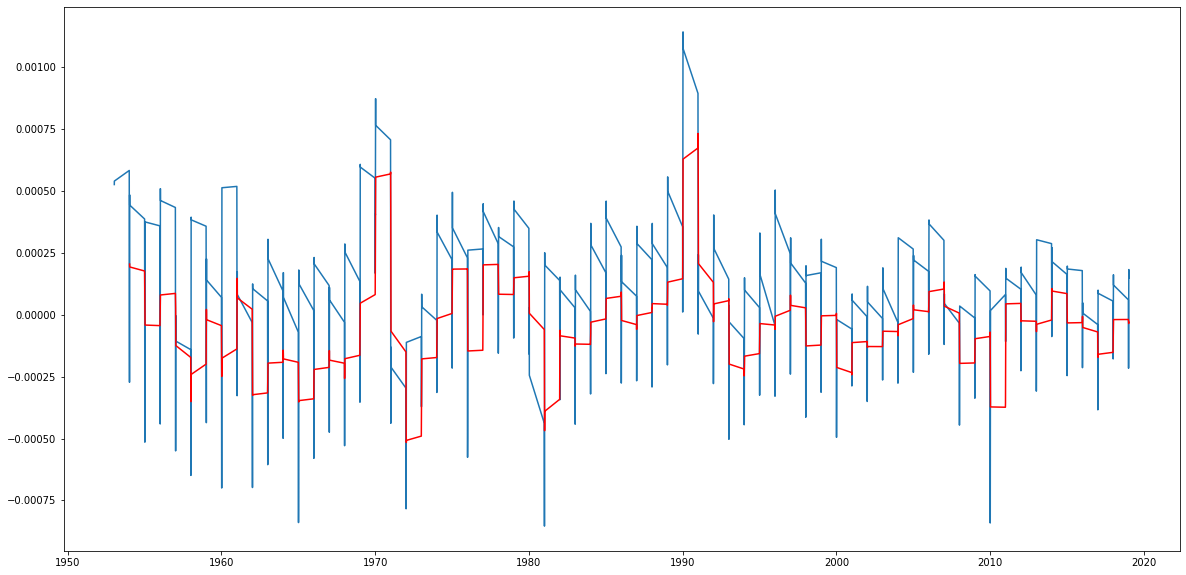

In [16]:
plt.figure(figsize=(20,10))
MAvg_log_diff_1=data_log_diff_1.rolling(window=12).mean()
MStd_log_diff_1=data_log_diff_1.rolling(window=12).std()
plt.plot(data_log_diff_1)
plt.plot(MAvg_log_diff_1, color='red')

Now mean is fluctuating but is at same level

In [17]:
print('Dickey-Fuller Test: ')
dftest_log_diff_1=adfuller(data_log_diff_1['value'], autolag='AIC')
dfoutput_log_diff_1=pd.Series(dftest_log_diff_1[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest_log_diff_1[4].items():
    dfoutput_log_diff_1['Critical Value (%s)'%key] = value
print(dfoutput_log_diff_1)

Dickey-Fuller Test: 
Test Statistic           -4.201287
p-value                   0.000656
Lags Used                18.000000
No. of Obs              775.000000
Critical Value (1%)      -3.438816
Critical Value (5%)      -2.865277
Critical Value (10%)     -2.568760
dtype: float64


P value is not coming as less than 0.05. Now data is stationary

In [19]:
from pmdarima.arima import auto_arima
stepwise_fitting=auto_arima(data_log_diff_1["value"],trace=True)
stepwise_fitting.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-12786.116, Time=1.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-10584.772, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-11991.424, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-10582.769, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-10571.375, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-12391.892, Time=1.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-12749.814, Time=0.44 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-12840.917, Time=0.63 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-12758.318, Time=1.37 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-10572.262, Time=1.24 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-10572.257, Time=1.34 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-12763.998, Time=0.64 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-12740.939, Time=0.63 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-12832.099, Time=0.80 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  794
Model:               SARIMAX(3, 0, 4)   Log Likelihood                6485.629
Date:                Wed, 18 May 2022   AIC                         -12953.259
Time:                        10:00:17   BIC                         -12911.165
Sample:                             0   HQIC                        -12937.083
                                - 794                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.695e-06   1.17e-06     -3.150      0.002      -6e-06    -1.4e-06
ar.L1          2.5543      0.003   1020.358      0.000       2.549       2.559
ar.L2         -2.4210      0.001  -2932.647      0.000      -2.423      -2.419
ar.L3          0.8290      0.002    369.625      0.000       0.825       0.833
ma.L1         -1.1465      0.000  -3861.429      0.000      -1.147      -1.146
ma.L2          0.4657      0.000   1745.430      0.000       0.465       0.466
ma.L3          0.0372      0.000    163.773      0.000       0.037       0.038
ma.L4          0.0807      0.000    515.923      0.000       0.080       0.081
sigma2      4.971e-09   1.05e-10     47.175      0.000    4.76e-09    5.18e-09
===================================================================================
Ljung-Box (L1) (Q):                   3.52   Jarque-Bera (JB):              6014.03
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.66e+18. Standard errors may be unstable.
"""

2.Forecast the population on the given dataset for the next 6 months.

In [20]:
from fbprophet import Prophet

In [21]:
import pandas as pd
import numpy as np

In [22]:
df=pd.read_csv('popdata.csv')

In [23]:
df.head()

,date,value
0,01-01-1952,127299.0
1,01-02-1952,127517.0
2,01-03-1952,127721.0
3,01-04-1952,127933.0
4,01-05-1952,128130.0


In [24]:
df['Value']=df['value']
df=df.drop(columns=['value'])
df.head()

,date,Value
0,01-01-1952,127299.0
1,01-02-1952,127517.0
2,01-03-1952,127721.0
3,01-04-1952,127933.0
4,01-05-1952,128130.0


In [25]:
df.columns=['ds','y']
df.head()

,ds,y
0,01-01-1952,127299.0
1,01-02-1952,127517.0
2,01-03-1952,127721.0
3,01-04-1952,127933.0
4,01-05-1952,128130.0


In [26]:
model=Prophet()

In [27]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future_dates=model.make_future_dataframe(periods=180)

In [29]:
future_dates

,ds
0,1952-01-01
1,1952-01-02
2,1952-01-03
3,1952-01-04
4,1952-01-05
...,...
991,2019-07-07
992,2019-07-08
993,2019-07-09
994,2019-07-10


In [30]:
future_predection=model.predict(future_dates)

In [31]:
future_predection.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1952-01-01,125266.522784,126966.497768,127667.337202,125266.522784,125266.522784,2027.669028,2027.669028,2027.669028,-11.731576,-11.731576,-11.731576,2039.400604,2039.400604,2039.400604,0.0,0.0,0.0,127294.191812
1,1952-01-02,125273.948989,127100.285210,127823.753974,125273.948989,125273.948989,2177.799916,2177.799916,2177.799916,-16.025851,-16.025851,-16.025851,2193.825768,2193.825768,2193.825768,0.0,0.0,0.0,127451.748905
2,1952-01-03,125281.375194,127287.370115,127992.188028,125281.375194,125281.375194,2348.490169,2348.490169,2348.490169,-7.681814,-7.681814,-7.681814,2356.171983,2356.171983,2356.171983,0.0,0.0,0.0,127629.865363
3,1952-01-04,125288.801399,127481.246600,128158.993086,125288.801399,125288.801399,2539.046823,2539.046823,2539.046823,7.661101,7.661101,7.661101,2531.385723,2531.385723,2531.385723,0.0,0.0,0.0,127827.848222
4,1952-01-05,125296.227604,127688.855741,128390.099186,125296.227604,125296.227604,2741.659707,2741.659707,2741.659707,19.251700,19.251700,19.251700,2722.408007,2722.408007,2722.408007,0.0,0.0,0.0,128037.887310


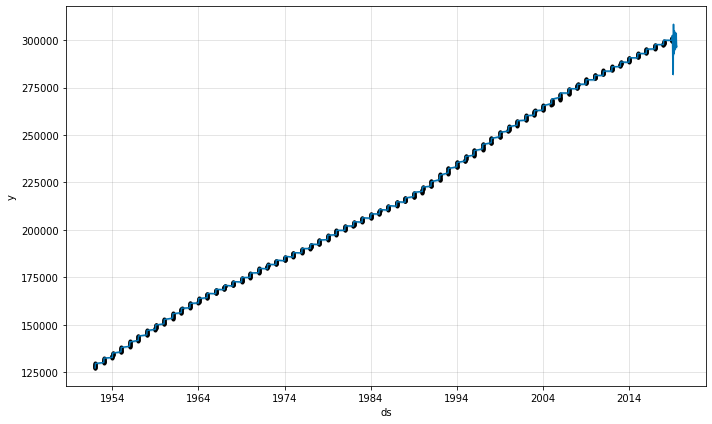

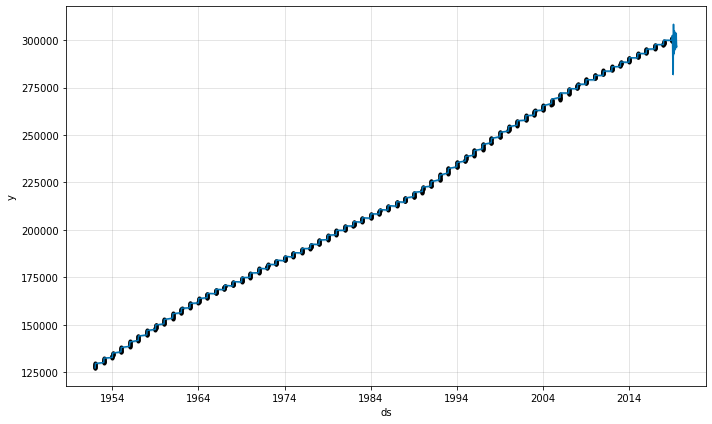

In [32]:
model.plot(future_predection)

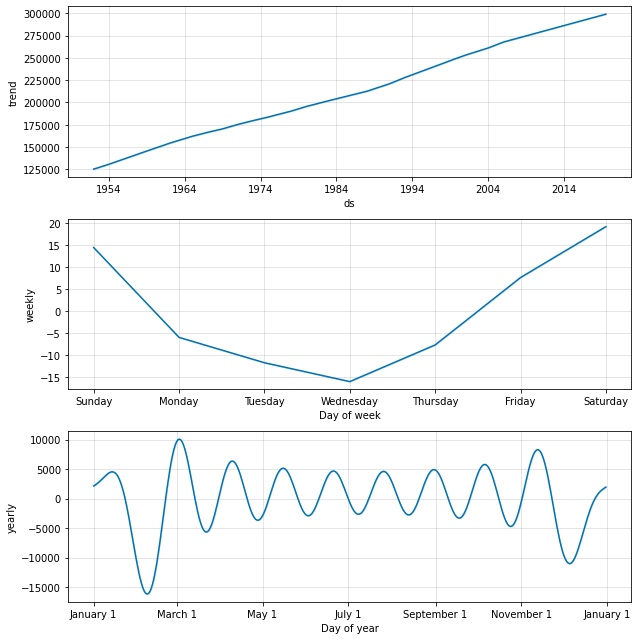

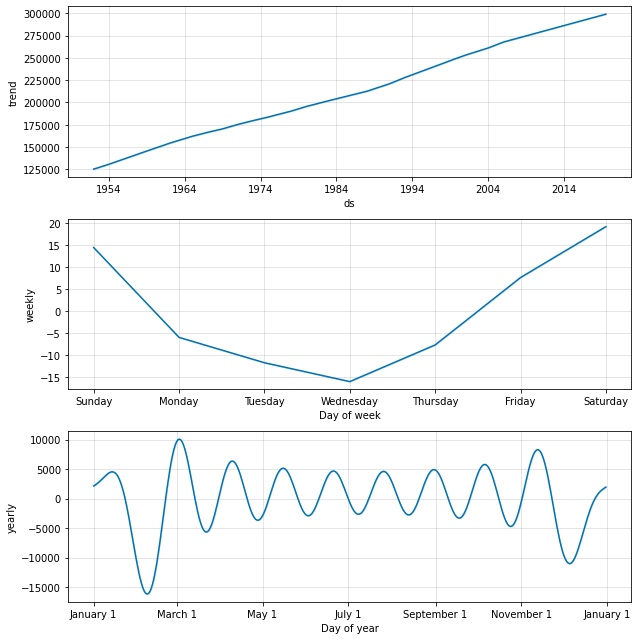

In [33]:
model.plot_components(future_predection)